In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

In [4]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [5]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

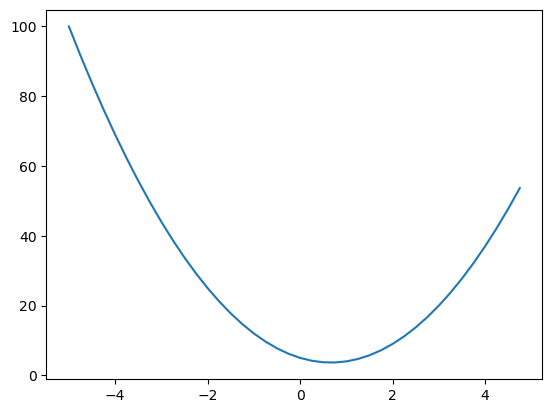

In [6]:
plt.plot(xs, ys)  #ploting the created parabolic equation

In [14]:
class Value:
    
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')
    
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label = 'e'
d = e  + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'

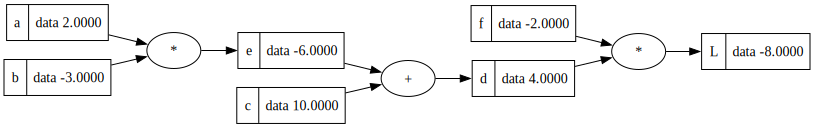

In [15]:
 import graphviz

def trace(root):
    """
    Traverses the computational graph from the root node to collect all nodes and edges.
    """
    nodes, edges = set(), set()
    
    def build(v):
        # Add the node if it hasn't been processed.
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
                
    build(root)
    return nodes, edges

def draw_dot(root):
    """
    Creates a GraphViz Digraph for the computational graph.
    """
    nodes, edges = trace(root)
    dot = graphviz.Digraph(format='svg')
    dot.attr(rankdir='LR')  # Layout from bottom to top.
    
    for v in nodes:
        uid = str(id(v))
        dot.node(name=uid, label= "{%s |data %.4f}" %(v.label, v.data), shape="record")
        # Use the operation as the label if it exists; otherwise, show the value.
        if v._op:
            dot.node(name = uid + v._op, label = v._op)
            dot.edge(uid + v._op, uid)
            
    for child, parent in edges:
        dot.edge(str(id(child)), str(id(parent)) + parent._op)
        
    return dot

# Visualize the computational graph.
dot = draw_dot(L)
dot  # In Jupyter, simply having the variable as the last line will render the graph.
